## NFL Pro bowler Classification Model ##

This project aims do develop a robust classification model that predicts whether or not Wide Receivers (WR), Running Backs (RB), Tight Ends (TE), and Quarterbacks (QB) in the National Football League (NFL) will be selected for the Pro Bowl. The Pro Bowl is an annual NFL event where top NFL players showcase their skills for the entertainment of the fans. Receiving a Pro Bowl invitation recognizes a player’s top performance relative to their peers.

This notebook compares the results of decision tree classifiers and random forest classifiers to predict a players Pro Bowl status.

For the purpose of the Data Analyst application for Central Coast Community Energy, only the Wide Reveiver prediction models are shown.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import requests
from bs4 import BeautifulSoup
import json
import re
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [3]:
dirname=os.getcwd()
path_parent = os.path.dirname(os.getcwd())
print(path_parent)

C:\Users\andre\OneDrive\Desktop\USC\DSCI550\Project


<h1>Data Acquisition</h1>

Please note: The volume of data scraped from Sports Reference and ESPN exceeds daily API request limits. The data acquisition portion of this project was split over multiple days, and won't be able to run in a single session.

<h2>Sports Reference</h2>

In [ ]:
years = [2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]

**Quarterbacks**

In [ ]:
url = "https://www.pro-football-reference.com/years/2000/passing.htm"
pass_df = pd.read_html(url)[0]
pass_df['Year'] = 2000
for year in years:
    temp_pass_df = pd.DataFrame()
    url = f"https://www.pro-football-reference.com/years/{year}/passing.htm"
    data = pd.read_html(url)
    temp_pass_df = temp_pass_df.append(data)
    temp_pass_df['Year'] = year
    pass_df = pass_df.append(temp_pass_df)
pass_df = pass_df.reset_index(drop=True)
# pass_df.to_csv(r'C:\Users\andre\OneDrive\Desktop\USC\DSCI550\Project\Data\Passing2012-2019.csv')
pass_df

**Rushing**

In [ ]:
url = "https://www.pro-football-reference.com/years/2000/rushing.htm"
rush_df = pd.read_html(url, header=1)[0]
rush_df['Year'] = 2000
for year in years:
    temp_rush_df = pd.DataFrame()
    url = f"https://www.pro-football-reference.com/years/{year}/rushing.htm"
    data = pd.read_html(url, header=1)
    temp_rush_df = temp_rush_df.append(data)
    temp_rush_df['Year'] = year
    rush_df = rush_df.append(temp_rush_df)
rush_df = rush_df.reset_index(drop=True)
#rush_df.to_csv(r'C:\Users\andre\OneDrive\Desktop\USC\DSCI550\Project\Data\Rushing2000-2019.csv')
rush_df

**Receiving**

In [ ]:
url = "https://www.pro-football-reference.com/years/2000/receiving.htm"
rec_df = pd.read_html(url)[0]
rec_df['Year'] = 2000
for year in years:
    temp_rec_df = pd.DataFrame()
    url = f"https://www.pro-football-reference.com/years/{year}/receiving.htm"
    data = pd.read_html(url)
    temp_rec_df = temp_rec_df.append(data)
    temp_rec_df['Year'] = year
    rec_df = rec_df.append(temp_rec_df)
rec_df = rec_df.reset_index(drop=True)
# rec_df.to_csv(r'C:\Users\andre\OneDrive\Desktop\USC\DSCI550\Project\Data\Receiving2012-2019.csv')
rec_df

<h2>ESPN</h2>

In [ ]:
#Split years in an effort not to max out requests
years0 = [2001,2002,2003,2004]
years01 = [2005,2006,2007,2008,2009]
years02 = [2010,2011,2012]
years1 = [2013,2014,2015,2016,2017]
years2 = [2018,2019]

<h3>Passing</h3>

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
url = "https://www.espn.com/nfl/stats/player/_/stat/passing/season/2000/seasontype/2?limit=1000"
espn_pass_df_p1 = pd.read_html(url)[0]
espn_pass_df_p2 = pd.read_html(url)[1]
espn_pass_df = pd.merge(espn_pass_df_p1, espn_pass_df_p2, left_index=True, right_index=True)

espn_pass_df['Year*'] = 2000

for year in years0:
    temp_pass_df = pd.DataFrame()
    url = f"https://www.espn.com/nfl/stats/player/_/stat/passing/season/{year}/seasontype/2?limit=1000"
    temp_pass_df_p1 = pd.read_html(url)[0]
    temp_pass_df_p2 = pd.read_html(url)[1]
    temp_pass_df = pd.merge(temp_pass_df_p1, temp_pass_df_p2, left_index=True, right_index=True)
    temp_pass_df['Year*'] = year
    espn_pass_df = espn_pass_df.append(temp_pass_df)
espn_pass_df = espn_pass_df.reset_index(drop=True)

In [ ]:
for year in years01:
    temp_pass_df = pd.DataFrame()
    url = f"https://www.espn.com/nfl/stats/player/_/stat/passing/season/{year}/seasontype/2?limit=1000"
    temp_pass_df_p1 = pd.read_html(url)[0]
    temp_pass_df_p2 = pd.read_html(url)[1]
    temp_pass_df = pd.merge(temp_pass_df_p1, temp_pass_df_p2, left_index=True, right_index=True)
    temp_pass_df['Year*'] = year
    espn_pass_df = espn_pass_df.append(temp_pass_df)
espn_pass_df = espn_pass_df.reset_index(drop=True)

In [ ]:
for year in years02:
    temp_pass_df = pd.DataFrame()
    url = f"https://www.espn.com/nfl/stats/player/_/stat/passing/season/{year}/seasontype/2?limit=1000"
    temp_pass_df_p1 = pd.read_html(url)[0]
    temp_pass_df_p2 = pd.read_html(url)[1]
    temp_pass_df = pd.merge(temp_pass_df_p1, temp_pass_df_p2, left_index=True, right_index=True)
    temp_pass_df['Year*'] = year
    espn_pass_df = espn_pass_df.append(temp_pass_df)
espn_pass_df = espn_pass_df.reset_index(drop=True)

In [ ]:
for year in years1:
    temp_pass_df = pd.DataFrame()
    url = f"https://www.espn.com/nfl/stats/player/_/stat/passing/season/{year}/seasontype/2?limit=1000"
    temp_pass_df_p1 = pd.read_html(url)[0]
    temp_pass_df_p2 = pd.read_html(url)[1]
    temp_pass_df = pd.merge(temp_pass_df_p1, temp_pass_df_p2, left_index=True, right_index=True)
    temp_pass_df['Year*'] = year
    espn_pass_df = espn_pass_df.append(temp_pass_df)
espn_pass_df = espn_pass_df.reset_index(drop=True)

In [ ]:
for year in years2:
    temp_pass_df = pd.DataFrame()
    
    url = f"https://www.espn.com/nfl/stats/player/_/stat/passing/season/{year}/seasontype/2?limit=1000"
    temp_pass_df_p1 = pd.read_html(url)[0]
    temp_pass_df_p2 = pd.read_html(url)[1]
    temp_pass_df = pd.merge(temp_pass_df_p1, temp_pass_df_p2, left_index=True, right_index=True)
    temp_pass_df['Year'] = year
    espn_pass_df = espn_pass_df.append(temp_pass_df)
espn_pass_df = espn_pass_df.reset_index(drop=True)
# espn_passing_df.to_csv(r'C:\Users\andre\OneDrive\Desktop\USC\DSCI550\Project\Data\ESPN\Passing2000-2019.csv')
espn_pass_df

<h3>Rushing</h3>

In [ ]:
url = "https://www.espn.com/nfl/stats/player/_/stat/rushing/season/2000/seasontype/2?limit=1000"
espn_rush_df_p1 = pd.read_html(url)[0]
espn_rush_df_p2 = pd.read_html(url)[1]
espn_rush_df = pd.merge(espn_rush_df_p1, espn_rush_df_p2, left_index=True, right_index=True)

espn_rush_df['Year*'] = 2000

for year in years0:
    temp_rush_df = pd.DataFrame()
    url = f"https://www.espn.com/nfl/stats/player/_/stat/rushing/season/{year}/seasontype/2?limit=1000"
    temp_rush_df_p1 = pd.read_html(url)[0]
    temp_rush_df_p2 = pd.read_html(url)[1]
    temp_rush_df = pd.merge(temp_rush_df_p1, temp_rush_df_p2, left_index=True, right_index=True)
    temp_rush_df['Year*'] = year
    espn_rush_df = espn_rush_df.append(temp_rush_df)
espn_rush_df = espn_rush_df.reset_index(drop=True)

In [ ]:
for year in years01:
    temp_rush_df = pd.DataFrame()
    url = f"https://www.espn.com/nfl/stats/player/_/stat/rushing/season/{year}/seasontype/2?limit=1000"
    temp_rush_df_p1 = pd.read_html(url)[0]
    temp_rush_df_p2 = pd.read_html(url)[1]
    temp_rush_df = pd.merge(temp_rush_df_p1, temp_rush_df_p2, left_index=True, right_index=True)
    temp_rush_df['Year*'] = year
    espn_rush_df = espn_rush_df.append(temp_rush_df)
    print(year)
espn_rush_df = espn_rush_df.reset_index(drop=True)

In [ ]:
for year in years02:
    temp_rush_df = pd.DataFrame()
    url = f"https://www.espn.com/nfl/stats/player/_/stat/rushing/season/{year}/seasontype/2?limit=1000"
    temp_rush_df_p1 = pd.read_html(url)[0]
    temp_rush_df_p2 = pd.read_html(url)[1]
    temp_rush_df = pd.merge(temp_rush_df_p1, temp_rush_df_p2, left_index=True, right_index=True)
    temp_rush_df['Year*'] = year
    espn_rush_df = espn_rush_df.append(temp_rush_df)
    print(year)
espn_rush_df = espn_rush_df.reset_index(drop=True)

In [ ]:
for year in years1:
    temp_rush_df = pd.DataFrame()
    url = f"https://www.espn.com/nfl/stats/player/_/stat/rushing/season/{year}/seasontype/2?limit=1000"
    temp_rush_df_p1 = pd.read_html(url)[0]
    temp_rush_df_p2 = pd.read_html(url)[1]
    temp_rush_df = pd.merge(temp_rush_df_p1, temp_rush_df_p2, left_index=True, right_index=True)
    temp_rush_df['Year*'] = year
    espn_rush_df = espn_rush_df.append(temp_rush_df)
    print(year)
espn_rush_df = espn_rush_df.reset_index(drop=True)

In [ ]:
for year in years2:
    temp_rush_df = pd.DataFrame()
    
    url = f"https://www.espn.com/nfl/stats/player/_/stat/rushing/season/{year}/seasontype/2?limit=1000"
    temp_rush_df_p1 = pd.read_html(url)[0]
    temp_rush_df_p2 = pd.read_html(url)[1]
    temp_rush_df = pd.merge(temp_rush_df_p1, temp_rush_df_p2, left_index=True, right_index=True)
    temp_rush_df['Year'] = year
    espn_rush_df = espn_rush_df.append(temp_rush_df)
espn_rush_df = espn_rush_df.reset_index(drop=True)
# espn_rushing_df.to_csv(r'C:\Users\andre\OneDrive\Desktop\USC\DSCI550\Project\Data\ESPN\Rushing2010-2019.csv')
espn_rush_df

<h3>Receiving</h3>

In [ ]:
url = "https://www.espn.com/nfl/stats/player/_/stat/receiving/season/2000/seasontype/2?limit=1000"
espn_rec_df_p1 = pd.read_html(url)[0]
espn_rec_df_p2 = pd.read_html(url)[1]
espn_rec_df = pd.DataFrame()
espn_rec_df = pd.merge(espn_rec_df_p1, espn_rec_df_p2, left_index=True, right_index=True)

espn_rec_df['Year*'] = 2000

for year in years0:
    temp_rec_df = pd.DataFrame()
    url = f"https://www.espn.com/nfl/stats/player/_/stat/receiving/season/{year}/seasontype/2?limit=1000"
    temp_rec_df_p1 = pd.read_html(url)[0]
    temp_rec_df_p2 = pd.read_html(url)[1]
    temp_rec_df = pd.merge(temp_rec_df_p1, temp_rec_df_p2, left_index=True, right_index=True)
    temp_rec_df['Year*'] = year
    espn_rec_df = espn_rec_df.append(temp_rec_df)
    print(year)
espn_rec_df = espn_rec_df.reset_index(drop=True)

In [ ]:
for year in years01:
    temp_rec_df = pd.DataFrame()
    url = f"https://www.espn.com/nfl/stats/player/_/stat/receiving/season/{year}/seasontype/2?limit=1000"
    temp_rec_df_p1 = pd.read_html(url)[0]
    temp_rec_df_p2 = pd.read_html(url)[1]
    temp_rec_df = pd.merge(temp_rec_df_p1, temp_rec_df_p2, left_index=True, right_index=True)
    temp_rec_df['Year*'] = year
    espn_rec_df = espn_rec_df.append(temp_rec_df)
    print(year)
espn_rec_df = espn_rec_df.reset_index(drop=True)

In [ ]:
for year in years02:
    temp_rec_df = pd.DataFrame()
    url = f"https://www.espn.com/nfl/stats/player/_/stat/receiving/season/{year}/seasontype/2?limit=1000"
    temp_rec_df_p1 = pd.read_html(url)[0]
    temp_rec_df_p2 = pd.read_html(url)[1]
    temp_rec_df = pd.merge(temp_rec_df_p1, temp_rec_df_p2, left_index=True, right_index=True)
    temp_rec_df['Year*'] = year
    espn_rec_df = espn_rec_df.append(temp_rec_df)
    print(year)
espn_rec_df = espn_rec_df.reset_index(drop=True)

In [ ]:
for year in years1:
    temp_rec_df = pd.DataFrame()
    url = f"https://www.espn.com/nfl/stats/player/_/stat/receiving/season/{year}/seasontype/2?limit=1000"
    temp_rec_df_p1 = pd.read_html(url)[0]
    temp_rec_df_p2 = pd.read_html(url)[1]
    temp_rec_df = pd.merge(temp_rec_df_p1, temp_rec_df_p2, left_index=True, right_index=True)
    temp_rec_df['Year*'] = year
    espn_rec_df = espn_rec_df.append(temp_rec_df)
    print(year)
espn_rec_df = espn_rec_df.reset_index(drop=True)

In [ ]:
for year in years2:
    temp_rec_df = pd.DataFrame()
    url = f"https://www.espn.com/nfl/stats/player/_/stat/receiving/season/{year}/seasontype/2?limit=1000"
    temp_rec_df_p1 = pd.read_html(url)[0]
    temp_rec_df_p2 = pd.read_html(url)[1]
    temp_rec_df = pd.merge(temp_rec_df_p1, temp_rec_df_p2, left_index=True, right_index=True)
    temp_rec_df['Year'] = year
    espn_rec_df = espn_rec_df.append(temp_rec_df)
espn_rec_df = espn_rec_df.reset_index(drop=True)
# espn_receiving_df.to_csv(r'C:\Users\andre\OneDrive\Desktop\USC\DSCI550\Project\Data\ESPNReceiving2012-2019.csv')
espn_rec_df

<h1>Data Cleaning</h1>

<h2>ESPN</h2>
<h3>Passing</h3>

In [3]:
for index, row in espn_pass_df.iterrows():
    espn_pass_df.loc[index, 'Name_Adj'] = re.findall(r"(.+?)[A-Z]+$",row['Name'])[0]
    espn_pass_df.loc[index, 'Tm_Adj'] = re.findall(r"[A-Z]+$",row['Name'])[0]
espn_pass_df

,Unnamed: 0,RK,Name,POS,GP,CMP,ATT,CMP%,YDS,AVG,...,LNG,TD,INT,SACK,SYL,QBR,RTG,Year*,Name_Adj,Tm_Adj
0,0,1,Peyton ManningIND,QB,16,357,571,62.5,4413,7.7,...,78,33,15,20,131,NaN,94.7,2000,Peyton Manning,IND
1,1,2,Jeff GarciaSF,QB,16,355,561,63.3,4278,7.6,...,69,31,10,24,155,NaN,97.6,2000,Jeff Garcia,SF
2,2,3,Elvis GrbacKC,QB,15,326,547,59.6,4169,7.6,...,81,28,14,29,213,NaN,89.9,2000,Elvis Grbac,KC
3,3,4,Daunte CulpepperMIN,QB,16,297,474,62.7,3937,8.3,...,78,33,16,34,181,NaN,98.0,2000,Daunte Culpepper,MIN
4,4,5,Brett FavreGB,QB,16,338,580,58.3,3812,6.6,...,67,20,16,33,236,NaN,78.0,2000,Brett Favre,GB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2048,2048,91,Kareem HuntCLE,RB,8,0,0,0.0,0,0.0,...,0,0,0,1,8,0.0,0.0,2019,Kareem Hunt,CLE
2049,2049,91,Christian McCaffreyCAR,RB,16,0,2,0.0,0,0.0,...,0,0,0,0,0,0.2,39.6,2019,Christian McCaffrey,CAR
2050,2050,91,Preston WilliamsMIA,WR,8,0,0,0.0,0,0.0,...,0,0,0,1,1,0.7,0.0,2019,Preston Williams,MIA
2051,2051,91,Steven SimsWSH,WR,16,0,1,0.0,0,0.0,...,0,0,0,0,0,NaN,39.6,2019,Steven Sims,WSH


<h3>Rushing</h3>

In [4]:
for index, row in espn_rush_df.iterrows():
    espn_rush_df.loc[index, 'Name_Adj'] = re.findall(r"(.+?)[A-Z]+$",row['Name'])[0]
    espn_rush_df.loc[index, 'Tm_Adj'] = re.findall(r"[A-Z]+$",row['Name'])[0]
espn_rush_df

,Unnamed: 0,RK,Name,POS,GP,ATT,YDS,AVG,LNG,BIG,TD,YDS/G,FUM,LST,FD,Year*,Name_Adj,Tm_Adj
0,0,1,Edgerrin JamesIND,RB,16,387,1709,4.4,30,9,13,106.8,5,5,99,2000,Edgerrin James,IND
1,1,2,Robert SmithMIN,RB,16,295,1521,5.2,72,11,7,95.1,4,1,63,2000,Robert Smith,MIN
2,2,3,Eddie GeorgeTEN,RB,16,403,1509,3.7,35,4,14,94.3,5,3,78,2000,Eddie George,TEN
3,3,4,Mike AndersonDEN,RB,16,297,1487,5.0,80,12,15,92.9,4,3,76,2000,Mike Anderson,DEN
4,4,5,Corey DillonCIN,RB,16,315,1435,4.6,80,12,7,89.7,4,3,66,2000,Corey Dillon,CIN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7630,7630,336,Tim BoyleGB,QB,3,5,-7,-1.4,0,0,0,-2.3,0,0,0,2019,Tim Boyle,GB
7631,7631,338,Jordan BerryPIT,P,16,2,-8,-4.0,0,0,0,-0.5,3,2,0,2019,Jordan Berry,PIT
7632,7632,339,Blake BortlesLAR,QB,3,2,-9,-4.5,1,0,0,-3.0,0,0,0,2019,Blake Bortles,LAR
7633,7633,339,Michael ThomasNO,WR,16,1,-9,-9.0,-9,0,0,-0.6,0,0,0,2019,Michael Thomas,NO


<h3>Receiving</h3>

In [5]:
for index, row in espn_rec_df.iterrows():
    espn_rec_df.loc[index, 'Name_Adj'] = re.findall(r"(.+?)[A-Z]+$",row['Name'])[0]
    espn_rec_df.loc[index, 'Tm_Adj'] = re.findall(r"[A-Z]+$",row['Name'])[0]
espn_rec_df

,Unnamed: 0.1,Unnamed: 0,RK,Name,POS,GP,REC,TGTS,YDS,AVG,...,LNG,BIG,YDS/G,FUM,LST,YAC,FD,Year*,Name_Adj,Tm_Adj
0,0,0.0,1,Torry HoltSTL,WR,16,82,0,1635,19.9,...,85,30,102.2,2,2,0,60,2000,Torry Holt,STL
1,1,1.0,2,Rod SmithDEN,WR,16,100,0,1602,16.0,...,49,30,100.1,1,1,0,77,2000,Rod Smith,DEN
2,2,2.0,3,Isaac BruceSTL,WR,16,87,0,1471,16.9,...,78,24,91.9,1,1,0,66,2000,Isaac Bruce,STL
3,3,3.0,4,Terrell OwensSF,WR,14,97,0,1451,15.0,...,69,23,103.6,2,1,0,65,2000,Terrell Owens,SF
4,4,4.0,5,Randy MossMIN,WR,16,77,0,1437,18.7,...,78,25,89.8,2,0,0,58,2000,Randy Moss,MIN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9243,9243,NaN,518,Kaleb McGaryATL,OT,16,1,1,-3,-3.0,...,-3,0,-0.2,0,0,-3,0,2019,Kaleb McGary,ATL
9244,9244,NaN,519,Andy DaltonCIN,QB,13,1,1,-4,-4.0,...,-4,0,-0.3,0,0,4,0,2019,Andy Dalton,CIN
9245,9245,NaN,519,Quincy EnunwaNYJ,WR,1,1,3,-4,-4.0,...,8,0,-4.0,1,1,-4,0,2019,Quincy Enunwa,NYJ
9246,9246,NaN,519,Garrett BradburyMIN,C,16,1,1,-4,-4.0,...,-4,0,-0.3,0,0,2,0,2019,Garrett Bradbury,MIN


<h2>Sports Reference</h2>
<h3>Passing</h3>

In [6]:
# Remove header rows
pass_df = pass_df[pass_df['Rk'] != 'Rk']

In [8]:
pass_df.columns

Index(['Unnamed: 0', 'Rk', 'Player', 'Tm', 'Age', 'Pos', 'G', 'GS', 'QBrec',
       'Cmp', 'Att', 'Cmp%', 'Yds', 'TD', 'TD%', 'Int', 'Int%', '1D', 'Lng',
       'Y/A', 'AY/A', 'Y/C', 'Y/G', 'Rate', 'Sk', 'Yds.1', 'Sk%', 'NY/A',
       'ANY/A', '4QC', 'GWD', 'Year', 'QBR', 'Player*'],
      dtype='object')

In [9]:
for index, row in pass_df.iterrows():
    playerName = re.findall(r"[A-Z|a-z|\s|'|.]+", row['Player'])[0]
    pass_df.loc[index, 'Player*'] = playerName
    
    ##
    pass_df.loc[index, 'PlayerYearTm*'] = playerName + str(row['Year']) + str(row['Tm'])
    ##
    
    # try to set position to uppercase
    try:
        pass_df.loc[index, 'Pos*'] = re.findall(r"[A-Z|a-z]+", row['Pos'])[0].upper()
    # if position is nan...
    except:
        # try to use the player name to get his position from the espn table
        try:
            pass_df.loc[index, 'Pos*'] = espn_pass_df.loc[(espn_pass_df['Name*'] == playerName)]['POS'].values[0]
        # otherwise set the adjusted position value to be nan
        except:
            pass_df.loc[index, 'Pos*'] = np.nan
# remove the rows where the adjusted position value is nan
pass_df = pass_df.dropna(subset=['Pos*'])
pass_df = pass_df.reset_index(drop=True)
pass_df

,Unnamed: 0,Rk,Player,Tm,Age,Pos,G,GS,QBrec,Cmp,...,Sk%,NY/A,ANY/A,4QC,GWD,Year,QBR,Player*,PlayerYearTm*,Pos*
0,0,1,Peyton Manning*,IND,24,QB,16,16,10-6-0,357,...,3.4,7.25,7.22,2,3,2000,NaN,Peyton Manning,Peyton Manning2000IND,QB
1,1,2,Jeff Garcia*,SFO,30,QB,16,16,6-10-0,355,...,4.1,7.05,7.34,NaN,NaN,2000,NaN,Jeff Garcia,Jeff Garcia2000SFO,QB
2,2,3,Elvis Grbac*,KAN,30,QB,15,15,7-8-0,326,...,5,6.87,6.75,3,3,2000,NaN,Elvis Grbac,Elvis Grbac2000KAN,QB
3,3,4,Daunte Culpepper*,MIN,23,QB,16,16,11-5-0,297,...,6.7,7.39,7.28,3,4,2000,NaN,Daunte Culpepper,Daunte Culpepper2000MIN,QB
4,4,5,Brett Favre,GNB,31,QB,16,16,9-7-0,338,...,5.4,5.83,5.31,0,4,2000,NaN,Brett Favre,Brett Favre2000GNB,QB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,100,98,Christian McCaffrey*+,CAR,23,RB,16,16,NaN,0,...,0,0.00,0.00,NaN,NaN,2019,0.2,Christian McCaffrey,Christian McCaffrey2019CAR,RB
1970,101,99,Zach Pascal,IND,25,WR,16,13,NaN,0,...,0,0.00,0.00,NaN,NaN,2019,0.8,Zach Pascal,Zach Pascal2019IND,WR
1971,102,100,Bilal Powell,NYJ,31,rb,13,1,NaN,0,...,0,0.00,0.00,NaN,NaN,2019,1.9,Bilal Powell,Bilal Powell2019NYJ,RB
1972,103,101,Steven Sims,WAS,22,wr,16,2,NaN,0,...,0,0.00,0.00,NaN,NaN,2019,NaN,Steven Sims,Steven Sims2019WAS,WR


In [10]:
pass_df.columns

Index(['Unnamed: 0', 'Rk', 'Player', 'Tm', 'Age', 'Pos', 'G', 'GS', 'QBrec',
       'Cmp', 'Att', 'Cmp%', 'Yds', 'TD', 'TD%', 'Int', 'Int%', '1D', 'Lng',
       'Y/A', 'AY/A', 'Y/C', 'Y/G', 'Rate', 'Sk', 'Yds.1', 'Sk%', 'NY/A',
       'ANY/A', '4QC', 'GWD', 'Year', 'QBR', 'Player*', 'PlayerYearTm*',
       'Pos*'],
      dtype='object')

In [11]:
originalColumns = ['Cmp', 'Att',
       'Cmp%', 'Yds', 'TD', 'TD%', 'Int', 'Int%', '1D', 'Lng', 'Y/A', 'AY/A',
       'Y/C', 'Y/G', 'Rate', 'QBR', 'Sk', 'Yds.1', 'Sk%', 'NY/A', 'ANY/A',
       '4QC', 'GWD']
adjustedColumns_Pass = []
for col in originalColumns:
    adjustedColumns_Pass.append('Pass_'+ col)
pass_df = pass_df.rename(columns=dict(zip(originalColumns,adjustedColumns_Pass)))
pass_df = pass_df.reset_index(drop=True)
pass_df

,Unnamed: 0,Rk,Player,Tm,Age,Pos,G,GS,QBrec,Pass_Cmp,...,Pass_Sk%,Pass_NY/A,Pass_ANY/A,Pass_4QC,Pass_GWD,Year,Pass_QBR,Player*,PlayerYearTm*,Pos*
0,0,1,Peyton Manning*,IND,24,QB,16,16,10-6-0,357,...,3.4,7.25,7.22,2,3,2000,NaN,Peyton Manning,Peyton Manning2000IND,QB
1,1,2,Jeff Garcia*,SFO,30,QB,16,16,6-10-0,355,...,4.1,7.05,7.34,NaN,NaN,2000,NaN,Jeff Garcia,Jeff Garcia2000SFO,QB
2,2,3,Elvis Grbac*,KAN,30,QB,15,15,7-8-0,326,...,5,6.87,6.75,3,3,2000,NaN,Elvis Grbac,Elvis Grbac2000KAN,QB
3,3,4,Daunte Culpepper*,MIN,23,QB,16,16,11-5-0,297,...,6.7,7.39,7.28,3,4,2000,NaN,Daunte Culpepper,Daunte Culpepper2000MIN,QB
4,4,5,Brett Favre,GNB,31,QB,16,16,9-7-0,338,...,5.4,5.83,5.31,0,4,2000,NaN,Brett Favre,Brett Favre2000GNB,QB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,100,98,Christian McCaffrey*+,CAR,23,RB,16,16,NaN,0,...,0,0.00,0.00,NaN,NaN,2019,0.2,Christian McCaffrey,Christian McCaffrey2019CAR,RB
1970,101,99,Zach Pascal,IND,25,WR,16,13,NaN,0,...,0,0.00,0.00,NaN,NaN,2019,0.8,Zach Pascal,Zach Pascal2019IND,WR
1971,102,100,Bilal Powell,NYJ,31,rb,13,1,NaN,0,...,0,0.00,0.00,NaN,NaN,2019,1.9,Bilal Powell,Bilal Powell2019NYJ,RB
1972,103,101,Steven Sims,WAS,22,wr,16,2,NaN,0,...,0,0.00,0.00,NaN,NaN,2019,NaN,Steven Sims,Steven Sims2019WAS,WR


<h3>Rushing</h3>

In [12]:
# Remove header rows
rush_df = rush_df[rush_df['Rk'] != 'Rk']

In [13]:
rush_df.columns

Index(['Unnamed: 0', 'Rk', 'Player', 'Tm', 'Age', 'Pos', 'G', 'GS', 'Att',
       'Yds', 'TD', '1D', 'Lng', 'Y/A', 'Y/G', 'Fmb', 'Year'],
      dtype='object')

In [14]:
for index, row in rush_df.iterrows():
    playerName = re.findall(r"[A-Z|a-z|\s|'|.]+", row['Player'])[0]
    rush_df.loc[index, 'Player*'] = playerName

    ##
    rush_df.loc[index, 'PlayerYearTm*'] = playerName + str(row['Year']) + str(row['Tm'])
    ##
    
    # try to set position to uppercase
    try:
        rush_df.loc[index, 'Pos*'] = re.findall(r"[A-Z|a-z]+", row['Pos'])[0].upper()
    # if position is nan...
    except:
        # try to use the player name to get his position from the espn table
        try:
            rush_df.loc[index, 'Pos*'] = espn_rush_df.loc[(espn_rush_df['Name*'] == playerName)]['POS'].values[0]
        # otherwise set the adjusted position value to be nan
        except:
            rush_df.loc[index, 'Pos*'] = np.nan
# remove the rows where the adjusted position value is nan
rush_df = rush_df.dropna(subset=['Pos*'])
rush_df = rush_df.reset_index(drop=True)
rush_df

,Unnamed: 0,Rk,Player,Tm,Age,Pos,G,GS,Att,Yds,TD,1D,Lng,Y/A,Y/G,Fmb,Year,Player*,PlayerYearTm*,Pos*
0,0,1,Eddie George*+,TEN,27,RB,16,16,403,1509,14,78,35,3.7,94.3,5,2000,Eddie George,Eddie George2000TEN,RB
1,1,2,Edgerrin James*,IND,22,RB,16,16,387,1709,13,100,30,4.4,106.8,5,2000,Edgerrin James,Edgerrin James2000IND,RB
2,2,3,Jerome Bettis,PIT,28,RB,16,16,355,1341,8,72,30,3.8,83.8,1,2000,Jerome Bettis,Jerome Bettis2000PIT,RB
3,3,4,James Stewart,DET,29,RB,16,16,339,1184,10,66,34,3.5,74.0,4,2000,James Stewart,James Stewart2000DET,RB
4,4,5,Stephen Davis*,WAS,26,RB,15,15,332,1318,11,72,50,4.0,87.9,4,2000,Stephen Davis,Stephen Davis2000WAS,RB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6692,6908,330,Danny Vitale,GNB,26,RB,15,4,1,3,0,0,3,3.0,0.2,0,2019,Danny Vitale,Danny Vitale2019GNB,RB
6693,6909,331,Greg Ward,PHI,24,WR,7,3,1,5,0,0,5,5.0,0.7,0,2019,Greg Ward,Greg Ward2019PHI,WR
6694,6910,332,Trevon Wesco,NYJ,24,TE,16,1,1,2,0,1,2,2.0,0.1,0,2019,Trevon Wesco,Trevon Wesco2019NYJ,TE
6695,6911,333,Mike Williams,LAC,25,WR,15,15,1,2,0,0,2,2.0,0.1,0,2019,Mike Williams,Mike Williams2019LAC,WR


In [16]:
originalColumns = ['Att', 'Yds', 'TD', '1D',
       'Lng', 'Y/A', 'Y/G', 'Fmb']
adjustedColumns_Rush = []
for col in originalColumns:
    adjustedColumns_Rush.append('Rush_'+ col)
rush_df = rush_df.rename(columns=dict(zip(originalColumns,adjustedColumns_Rush)))
rush_df = rush_df.reset_index(drop=True)
rush_df

,Unnamed: 0,Rk,Player,Tm,Age,Pos,G,GS,Rush_Att,Rush_Yds,Rush_TD,Rush_1D,Rush_Lng,Rush_Y/A,Rush_Y/G,Rush_Fmb,Year,Player*,PlayerYearTm*,Pos*
0,0,1,Eddie George*+,TEN,27,RB,16,16,403,1509,14,78,35,3.7,94.3,5,2000,Eddie George,Eddie George2000TEN,RB
1,1,2,Edgerrin James*,IND,22,RB,16,16,387,1709,13,100,30,4.4,106.8,5,2000,Edgerrin James,Edgerrin James2000IND,RB
2,2,3,Jerome Bettis,PIT,28,RB,16,16,355,1341,8,72,30,3.8,83.8,1,2000,Jerome Bettis,Jerome Bettis2000PIT,RB
3,3,4,James Stewart,DET,29,RB,16,16,339,1184,10,66,34,3.5,74.0,4,2000,James Stewart,James Stewart2000DET,RB
4,4,5,Stephen Davis*,WAS,26,RB,15,15,332,1318,11,72,50,4.0,87.9,4,2000,Stephen Davis,Stephen Davis2000WAS,RB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6692,6908,330,Danny Vitale,GNB,26,RB,15,4,1,3,0,0,3,3.0,0.2,0,2019,Danny Vitale,Danny Vitale2019GNB,RB
6693,6909,331,Greg Ward,PHI,24,WR,7,3,1,5,0,0,5,5.0,0.7,0,2019,Greg Ward,Greg Ward2019PHI,WR
6694,6910,332,Trevon Wesco,NYJ,24,TE,16,1,1,2,0,1,2,2.0,0.1,0,2019,Trevon Wesco,Trevon Wesco2019NYJ,TE
6695,6911,333,Mike Williams,LAC,25,WR,15,15,1,2,0,0,2,2.0,0.1,0,2019,Mike Williams,Mike Williams2019LAC,WR


<h3>Receiving</h3>

In [15]:
rec_df.columns

Index(['Unnamed: 0', 'Rk', 'Player', 'Tm', 'Age', 'Pos', 'G', 'GS', 'Tgt',
       'Rec', 'Ctch%', 'Yds', 'Y/R', 'TD', '1D', 'Lng', 'Y/Tgt', 'R/G', 'Y/G',
       'Fmb', 'Year'],
      dtype='object')

In [17]:
# Remove header rows
rec_df = rec_df[rec_df['Rk'] != 'Rk']

In [19]:
for index, row in rec_df.iterrows():
    playerName = re.findall(r"[A-Z|a-z|\s|'|.]+", row['Player'])[0]
    rec_df.loc[index, 'Player*'] = playerName
    
    ##
    rec_df.loc[index, 'PlayerYearTm*'] = playerName + str(row['Year']) + str(row['Tm'])
    ##
    
    # try to set position to uppercase
    try:
        rec_df.loc[index, 'Pos*'] = re.findall(r"[A-Z|a-z]+", row['Pos'])[0].upper()
    # if position is nan...
    except:
        # try to use the player name to get his position from the espn table
        try:
            rec_df.loc[index, 'Pos*'] = espn_rec_df.loc[(espn_rec_df['Name*'] == playerName)]['POS'].values[0]
        # otherwise set the adjusted position value to be nan
        except:
            rec_df.loc[index, 'Pos*'] = np.nan
# remove the rows where the adjusted position value is nan
rec_df = rec_df.dropna(subset=['Pos*'])
rec_df = rec_df.reset_index(drop=True)
rec_df

,Unnamed: 0,Rk,Player,Tm,Age,Pos,G,GS,Tgt,Rec,...,1D,Lng,Y/Tgt,R/G,Y/G,Fmb,Year,Player*,PlayerYearTm*,Pos*
0,0,1,Marvin Harrison*,IND,28,WR,16,16,169,102,...,70,78,8.4,6.4,88.3,2,2000,Marvin Harrison,Marvin Harrison2000IND,WR
1,1,2,Muhsin Muhammad,CAR,27,WR,16,16,156,102,...,62,36,7.6,6.4,73.9,1,2000,Muhsin Muhammad,Muhsin Muhammad2000CAR,WR
2,2,3,Ed McCaffrey,DEN,32,WR,16,16,149,101,...,69,61,8.8,6.3,82.3,0,2000,Ed McCaffrey,Ed McCaffrey2000DEN,WR
3,3,4,Rod Smith*,DEN,30,WR,16,16,173,100,...,77,49,9.3,6.3,100.1,1,2000,Rod Smith,Rod Smith2000DEN,WR
4,4,5,Terrell Owens*+,SFO,27,WR,14,13,146,97,...,65,69,9.9,6.9,103.6,3,2000,Terrell Owens,Terrell Owens2000SFO,WR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9121,519,504,Jamize Olawale,DAL,30,fb,16,5,2,0,...,0,0,0.0,0.0,0.0,NaN,2019,Jamize Olawale,Jamize Olawale2019DAL,FB
9122,520,505,Jace Sternberger,GNB,23,te,6,1,1,0,...,0,0,0.0,0.0,0.0,NaN,2019,Jace Sternberger,Jace Sternberger2019GNB,TE
9123,521,506,Taywan Taylor,CLE,24,wr,3,1,1,0,...,0,0,0.0,0.0,0.0,0,2019,Taywan Taylor,Taywan Taylor2019CLE,WR
9124,522,507,Tyrod Taylor,LAC,30,qb,8,0,1,0,...,0,0,0.0,0.0,0.0,0,2019,Tyrod Taylor,Tyrod Taylor2019LAC,QB


In [20]:
originalColumns = ['Tgt', 'Rec', 'Ctch%',
       'Yds', 'Y/R', 'TD', '1D', 'Lng', 'Y/Tgt', 'R/G', 'Y/G', 'Fmb']
adjustedColumns_Rec = []
for col in originalColumns:
    adjustedColumns_Rec.append('Rec_'+ col)
rec_df = rec_df.rename(columns=dict(zip(originalColumns,adjustedColumns_Rec)))
rec_df = rec_df.reset_index(drop=True)
rec_df

,Unnamed: 0,Rk,Player,Tm,Age,Pos,G,GS,Rec_Tgt,Rec_Rec,...,Rec_1D,Rec_Lng,Rec_Y/Tgt,Rec_R/G,Rec_Y/G,Rec_Fmb,Year,Player*,PlayerYearTm*,Pos*
0,0,1,Marvin Harrison*,IND,28,WR,16,16,169,102,...,70,78,8.4,6.4,88.3,2,2000,Marvin Harrison,Marvin Harrison2000IND,WR
1,1,2,Muhsin Muhammad,CAR,27,WR,16,16,156,102,...,62,36,7.6,6.4,73.9,1,2000,Muhsin Muhammad,Muhsin Muhammad2000CAR,WR
2,2,3,Ed McCaffrey,DEN,32,WR,16,16,149,101,...,69,61,8.8,6.3,82.3,0,2000,Ed McCaffrey,Ed McCaffrey2000DEN,WR
3,3,4,Rod Smith*,DEN,30,WR,16,16,173,100,...,77,49,9.3,6.3,100.1,1,2000,Rod Smith,Rod Smith2000DEN,WR
4,4,5,Terrell Owens*+,SFO,27,WR,14,13,146,97,...,65,69,9.9,6.9,103.6,3,2000,Terrell Owens,Terrell Owens2000SFO,WR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9121,519,504,Jamize Olawale,DAL,30,fb,16,5,2,0,...,0,0,0.0,0.0,0.0,NaN,2019,Jamize Olawale,Jamize Olawale2019DAL,FB
9122,520,505,Jace Sternberger,GNB,23,te,6,1,1,0,...,0,0,0.0,0.0,0.0,NaN,2019,Jace Sternberger,Jace Sternberger2019GNB,TE
9123,521,506,Taywan Taylor,CLE,24,wr,3,1,1,0,...,0,0,0.0,0.0,0.0,0,2019,Taywan Taylor,Taywan Taylor2019CLE,WR
9124,522,507,Tyrod Taylor,LAC,30,qb,8,0,1,0,...,0,0,0.0,0.0,0.0,0,2019,Tyrod Taylor,Tyrod Taylor2019LAC,QB


## Merge

In [21]:
adjustedColumns_Rush.append("PlayerYearTm*")
adjustedColumns_Pass.append("PlayerYearTm*")
adjustedColumns_Rec.append("PlayerYearTm*")

rush_rec_pass_df = rush_df.merge(rec_df[adjustedColumns_Rec], on='PlayerYearTm*', how='left').merge(pass_df[adjustedColumns_Pass], on='PlayerYearTm*', how='left')
# .drop_duplicates(subset=['PlayerYearTm*'])
# 
pass_rush_rec_df = pass_df.merge(rush_df[adjustedColumns_Rush], on='PlayerYearTm*', how='left').merge(rec_df[adjustedColumns_Rec], on='PlayerYearTm*', how='left')
# .drop_duplicates(subset=['PlayerYearTm*'])
# 
rec_rush_pass_df = rec_df.merge(rush_df[adjustedColumns_Rush], on='PlayerYearTm*', how='left').merge(pass_df[adjustedColumns_Pass], on='PlayerYearTm*', how='left')
# .drop_duplicates(subset=['PlayerYearTm*'])
# 


In [22]:
rush_rec_pass_df

,Unnamed: 0,Rk,Player,Tm,Age,Pos,G,GS,Rush_Att,Rush_Yds,...,Pass_Y/G,Pass_Rate,Pass_QBR,Pass_Sk,Pass_Yds.1,Pass_Sk%,Pass_NY/A,Pass_ANY/A,Pass_4QC,Pass_GWD
0,0,1,Eddie George*+,TEN,27,RB,16,16,403,1509,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,Edgerrin James*,IND,22,RB,16,16,387,1709,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,3,Jerome Bettis,PIT,28,RB,16,16,355,1341,...,0.0,0.0,NaN,0,0,0,0.00,-22.50,NaN,NaN
3,3,4,James Stewart,DET,29,RB,16,16,339,1184,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,5,Stephen Davis*,WAS,26,RB,15,15,332,1318,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6692,6908,330,Danny Vitale,GNB,26,RB,15,4,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6693,6909,331,Greg Ward,PHI,24,WR,7,3,1,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6694,6910,332,Trevon Wesco,NYJ,24,TE,16,1,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6695,6911,333,Mike Williams,LAC,25,WR,15,15,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df = pd.concat([rush_rec_pass_df, pass_rush_rec_df, rec_rush_pass_df])

In [24]:
df = df.reset_index(drop=True)
df

,Unnamed: 0,Rk,Player,Tm,Age,Pos,G,GS,Rush_Att,Rush_Yds,...,Pass_Rate,Pass_QBR,Pass_Sk,Pass_Yds.1,Pass_Sk%,Pass_NY/A,Pass_ANY/A,Pass_4QC,Pass_GWD,QBrec
0,0,1,Eddie George*+,TEN,27,RB,16,16,403,1509,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,Edgerrin James*,IND,22,RB,16,16,387,1709,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,3,Jerome Bettis,PIT,28,RB,16,16,355,1341,...,0.0,NaN,0,0,0,0.00,-22.50,NaN,NaN,NaN
3,3,4,James Stewart,DET,29,RB,16,16,339,1184,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,5,Stephen Davis*,WAS,26,RB,15,15,332,1318,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18089,519,504,Jamize Olawale,DAL,30,fb,16,5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18090,520,505,Jace Sternberger,GNB,23,te,6,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18091,521,506,Taywan Taylor,CLE,24,wr,3,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18092,522,507,Tyrod Taylor,LAC,30,qb,8,0,10,7,...,120.1,3.3,0,0,0,5.50,8.83,NaN,NaN,NaN


In [25]:
df = df.drop_duplicates(subset=['PlayerYearTm*'])
df = df.reset_index(drop=True)
df

,Unnamed: 0,Rk,Player,Tm,Age,Pos,G,GS,Rush_Att,Rush_Yds,...,Pass_Rate,Pass_QBR,Pass_Sk,Pass_Yds.1,Pass_Sk%,Pass_NY/A,Pass_ANY/A,Pass_4QC,Pass_GWD,QBrec
0,0,1,Eddie George*+,TEN,27,RB,16,16,403,1509,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,Edgerrin James*,IND,22,RB,16,16,387,1709,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,3,Jerome Bettis,PIT,28,RB,16,16,355,1341,...,0.0,NaN,0,0,0,0.00,-22.50,NaN,NaN,NaN
3,3,4,James Stewart,DET,29,RB,16,16,339,1184,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,5,Stephen Davis*,WAS,26,RB,15,15,332,1318,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11234,518,503,David Long,LAR,21,db,8,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11235,519,504,Jamize Olawale,DAL,30,fb,16,5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11236,520,505,Jace Sternberger,GNB,23,te,6,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11237,521,506,Taywan Taylor,CLE,24,wr,3,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
nanDict = {np.nan: 0}
for col in df.columns:
    df[col] = df[col].replace(nanDict)
df.isna().sum()

Unnamed: 0       0
Rk               0
Player           0
Tm               0
Age              0
Pos              0
G                0
GS               0
Rush_Att         0
Rush_Yds         0
Rush_TD          0
Rush_1D          0
Rush_Lng         0
Rush_Y/A         0
Rush_Y/G         0
Rush_Fmb         0
Year             0
Player*          0
PlayerYearTm*    0
Pos*             0
Rec_Tgt          0
Rec_Rec          0
Rec_Ctch%        0
Rec_Yds          0
Rec_Y/R          0
Rec_TD           0
Rec_1D           0
Rec_Lng          0
Rec_Y/Tgt        0
Rec_R/G          0
Rec_Y/G          0
Rec_Fmb          0
Pass_Cmp         0
Pass_Att         0
Pass_Cmp%        0
Pass_Yds         0
Pass_TD          0
Pass_TD%         0
Pass_Int         0
Pass_Int%        0
Pass_1D          0
Pass_Lng         0
Pass_Y/A         0
Pass_AY/A        0
Pass_Y/C         0
Pass_Y/G         0
Pass_Rate        0
Pass_QBR         0
Pass_Sk          0
Pass_Yds.1       0
Pass_Sk%         0
Pass_NY/A        0
Pass_ANY/A  

In [27]:
df

,Unnamed: 0,Rk,Player,Tm,Age,Pos,G,GS,Rush_Att,Rush_Yds,...,Pass_Rate,Pass_QBR,Pass_Sk,Pass_Yds.1,Pass_Sk%,Pass_NY/A,Pass_ANY/A,Pass_4QC,Pass_GWD,QBrec
0,0,1,Eddie George*+,TEN,27,RB,16,16,403,1509,...,0,0,0,0,0,0,0,0,0,0
1,1,2,Edgerrin James*,IND,22,RB,16,16,387,1709,...,0,0,0,0,0,0,0,0,0,0
2,2,3,Jerome Bettis,PIT,28,RB,16,16,355,1341,...,0.0,0,0,0,0,0.00,-22.50,0,0,0
3,3,4,James Stewart,DET,29,RB,16,16,339,1184,...,0,0,0,0,0,0,0,0,0,0
4,4,5,Stephen Davis*,WAS,26,RB,15,15,332,1318,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11234,518,503,David Long,LAR,21,db,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11235,519,504,Jamize Olawale,DAL,30,fb,16,5,0,0,...,0,0,0,0,0,0,0,0,0,0
11236,520,505,Jace Sternberger,GNB,23,te,6,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11237,521,506,Taywan Taylor,CLE,24,wr,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Split by position

In [28]:
qbs_df = df.loc[df['Pos*'] == 'QB'].reset_index(drop=True)
rbs_df = df.loc[df['Pos*'] == 'RB'].reset_index(drop=True)
wrs_df = df.loc[df['Pos*'] == 'WR'].reset_index(drop=True)
tes_df = df.loc[df['Pos*'] == 'TE'].reset_index(drop=True)

In [29]:
qbs_df

,Unnamed: 0,Rk,Player,Tm,Age,Pos,G,GS,Rush_Att,Rush_Yds,...,Pass_Rate,Pass_QBR,Pass_Sk,Pass_Yds.1,Pass_Sk%,Pass_NY/A,Pass_ANY/A,Pass_4QC,Pass_GWD,QBrec
0,42,42,Daunte Culpepper*,MIN,23,QB,16,16,89,470,...,98.0,0,34,181,6.7,7.39,7.28,3,4,0
1,43,43,Rich Gannon*+,OAK,35,QB,16,16,89,529,...,92.4,0,28,124,5.6,6.60,6.73,3,4,0
2,45,45,Donovan McNabb*,PHI,24,QB,16,16,86,629,...,77.8,0,45,262,7.3,5.05,4.79,2,3,0
3,48,48,Kordell Stewart,PIT,28,QB,16,11,78,436,...,73.6,0,30,150,9.4,5.36,4.92,1,1,0
4,52,52,Shaun King,TAM,23,QB,16,16,73,353,...,75.8,0,37,240,8,5.44,4.95,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516,480,466,Joe Webb,CAR,30,qb,14,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1517,324,315,Logan Thomas,BUF,26,qb,12,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1518,393,382,Tanner Gentry,CHI,23,qb,4,3,0,0,...,0,0,0,0,0,0,0,0,0,0
1519,440,427,Joe Webb,HOU,32,qb,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Save locally for use in modeling step

In [30]:
# qbs_df.to_csv(r"C:\Users\andre\OneDrive\Desktop\USC\DSCI550\Project\Data\2000-2019_PositionData\qbs.csv")
# wrs_df.to_csv(r"C:\Users\andre\OneDrive\Desktop\USC\DSCI550\Project\Data\2000-2019_PositionData\wrs.csv")
# rbs_df.to_csv(r"C:\Users\andre\OneDrive\Desktop\USC\DSCI550\Project\Data\2000-2019_PositionData\rbs.csv")
# tes_df.to_csv(r"C:\Users\andre\OneDrive\Desktop\USC\DSCI550\Project\Data\2000-2019_PositionData\tes.csv")

In [4]:
wr_df = pd.read_csv(os.path.join(path_parent, "Data\\Clean_Data\\wrs.csv"))

In [5]:
wr_df['probowl']=0

In [6]:
for index, row in wr_df.iterrows():
    if "*" in row['Player']:
        row['probowl'] = 1
        wr_df.loc[index, 'probowl'] = 1

## Modeling

<h3> Wide Receiver Decision Tree (All Variables) [1] </h3>

In [7]:
wr_df_features = wr_df.iloc[:,8:]
wr_df_features = wr_df_features.drop(['Player*','Year','PlayerYearTm*','Pos*'], axis=1)
wr_df_features.head()

,GS,Rush_Att,Rush_Yds,Rush_TD,Rush_1D,Rush_Lng,Rush_Y/A,Rush_Y/G,Rush_Fmb,Rec_Tgt,...,Pass_QBR,Pass_Sk,Pass_Yds.1,Pass_Sk%,Pass_NY/A,Pass_ANY/A,Pass_4QC,Pass_GWD,QBrec,probowl
0,16,16,148,2,6,77,9.3,9.3,2,126,...,0.0,0,0,0.0,0.0,0.0,0,0,0,0
1,9,10,82,0,4,34,8.2,5.1,1,74,...,0.0,0,0,0.0,0.0,0.0,0,0,0,0
2,8,9,33,0,1,13,3.7,2.2,1,82,...,0.0,0,0,0.0,0.0,0.0,0,0,0,0
3,9,8,73,0,3,37,9.1,8.1,1,43,...,0.0,0,0,0.0,0.0,0.0,0,0,0,0
4,15,6,46,0,2,35,7.7,2.9,2,119,...,0.0,0,0,0.0,0.0,0.0,0,0,0,0


In [8]:
wr_df_features.dtypes

GS              int64
Rush_Att        int64
Rush_Yds        int64
Rush_TD         int64
Rush_1D         int64
Rush_Lng        int64
Rush_Y/A      float64
Rush_Y/G      float64
Rush_Fmb        int64
Rec_Tgt         int64
Rec_Rec         int64
Rec_Ctch%      object
Rec_Yds         int64
Rec_Y/R       float64
Rec_TD          int64
Rec_1D          int64
Rec_Lng         int64
Rec_Y/Tgt     float64
Rec_R/G       float64
Rec_Y/G       float64
Rec_Fmb         int64
Pass_Cmp        int64
Pass_Att        int64
Pass_Cmp%     float64
Pass_Yds        int64
Pass_TD         int64
Pass_TD%      float64
Pass_Int        int64
Pass_Int%     float64
Pass_1D         int64
Pass_Lng        int64
Pass_Y/A      float64
Pass_AY/A     float64
Pass_Y/C      float64
Pass_Y/G      float64
Pass_Rate     float64
Pass_QBR      float64
Pass_Sk         int64
Pass_Yds.1      int64
Pass_Sk%      float64
Pass_NY/A     float64
Pass_ANY/A    float64
Pass_4QC        int64
Pass_GWD        int64
QBrec           int64
probowl   

In [9]:
#Change all % columns to float, then classifier will run.
wr_df_features['Rec_Ctch%'] = wr_df_features['Rec_Ctch%'].str.rstrip("%").astype(float)/100

In [10]:
train1, test1 = train_test_split(wr_df_features, test_size=0.333, stratify=wr_df_features['probowl'])

In [11]:
train_y1 = train1['probowl']
train_x1=train1.drop(columns=['probowl'])
test_y1=test1['probowl']
test_x1=test1.drop(columns=['probowl'])

In [12]:
dt1 =DecisionTreeClassifier()

In [13]:
dt1.fit(train_x1, train_y1)

DecisionTreeClassifier()

In [14]:
dt1_pred = dt1.predict(test_x1)

In [15]:
print(confusion_matrix(test_y1,dt1_pred))

[[1123   44]
 [  37   48]]


In [16]:
print(classification_report(test_y1,dt1_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1167
           1       0.52      0.56      0.54        85

    accuracy                           0.94      1252
   macro avg       0.74      0.76      0.75      1252
weighted avg       0.94      0.94      0.94      1252



In [17]:
dt1_prob = dt1.predict_proba(test_x1)

In [18]:
test_y1_2 = test_y1.to_numpy()
roc_auc_score(test_y1_2, dt1_prob[:,1])

0.7612631685064771

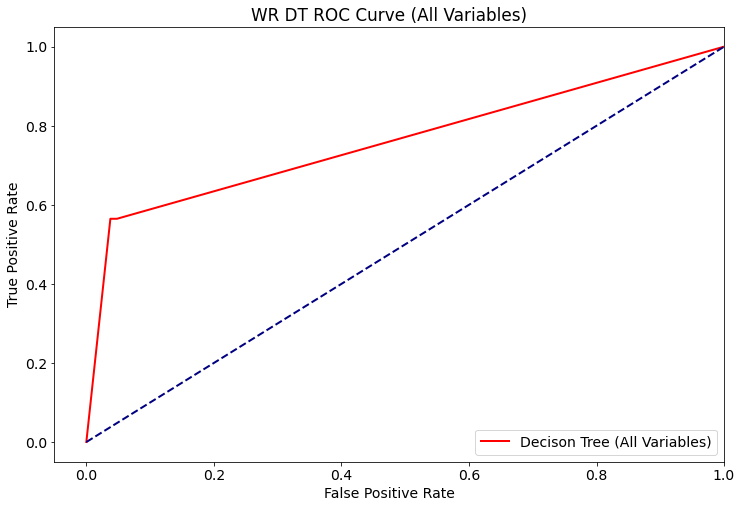

In [19]:
fpr1, tpr1, _ = roc_curve(test_y1_2, dt1_prob[:,1])
plt.plot(fpr1,tpr1, color ='red', lw=2, label="Decison Tree (All Variables)")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-.05, 1.0])
plt.ylim([-.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('WR DT ROC Curve (All Variables)')
plt.legend(loc="lower right")
# plt.show()
plt.savefig(os.path.join(path_parent, 'Figures\WRs\DT_all.jpg'), bbox_inches='tight')

<h3> Wide Receiver Decision Tree (Only Receiving Variables) [2] </h3>

In [20]:
wr_df_features2 = wr_df.iloc[:,8:]
wr_df_features2 = wr_df_features2.drop(['Player*','Year','PlayerYearTm*','Pos*'], axis=1)
wr_df_features2 = wr_df_features2[wr_df_features2.columns.drop(list(wr_df.filter(regex='Pass')))]
wr_df_features2 = wr_df_features2[wr_df_features2.columns.drop(list(wr_df.filter(regex='Rush')))]
print(wr_df_features2.columns)
wr_df_features2.head()

Index(['GS', 'Rec_Tgt', 'Rec_Rec', 'Rec_Ctch%', 'Rec_Yds', 'Rec_Y/R', 'Rec_TD',
       'Rec_1D', 'Rec_Lng', 'Rec_Y/Tgt', 'Rec_R/G', 'Rec_Y/G', 'Rec_Fmb',
       'QBrec', 'probowl'],
      dtype='object')


,GS,Rec_Tgt,Rec_Rec,Rec_Ctch%,Rec_Yds,Rec_Y/R,Rec_TD,Rec_1D,Rec_Lng,Rec_Y/Tgt,Rec_R/G,Rec_Y/G,Rec_Fmb,QBrec,probowl
0,16,126,51,40.5%,592,11.6,4,34,46,4.7,3.2,37.0,2,0,0
1,9,74,50,67.6%,653,13.1,2,29,50,8.8,3.1,40.8,1,0,0
2,8,82,39,47.6%,422,10.8,0,24,37,5.1,2.6,28.1,1,0,0
3,9,43,25,58.1%,350,14.0,1,18,44,8.1,2.8,38.9,1,0,0
4,15,119,83,69.7%,944,11.4,4,46,44,7.9,5.2,59.0,2,0,0


In [21]:
#Change all % columns to float, then classifier will run.
wr_df_features2['Rec_Ctch%'] = wr_df_features2['Rec_Ctch%'].str.rstrip("%").astype(float)/100

In [22]:
train2, test2 = train_test_split(wr_df_features2, test_size=0.333, stratify=wr_df_features2['probowl'])

In [23]:
train_y2 = train2['probowl']
train_x2=train2.drop(columns=['probowl'])
test_y2=test2['probowl']
test_x2=test2.drop(columns=['probowl'])

In [24]:
dt2 = DecisionTreeClassifier()
dt2.fit(train_x2, train_y2)

DecisionTreeClassifier()

In [25]:
dt2_pred = dt2.predict(test_x2)

In [26]:
print(confusion_matrix(test_y2,dt2_pred))

[[1137   30]
 [  34   51]]


In [27]:
print(classification_report(test_y2,dt2_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1167
           1       0.63      0.60      0.61        85

    accuracy                           0.95      1252
   macro avg       0.80      0.79      0.79      1252
weighted avg       0.95      0.95      0.95      1252



In [28]:
dt2_prob = dt2.predict_proba(test_x2)

In [29]:
test_y2_2 = test_y2.to_numpy()
roc_auc_score(test_y2_2, dt2_prob[:,1])

0.779948586118252

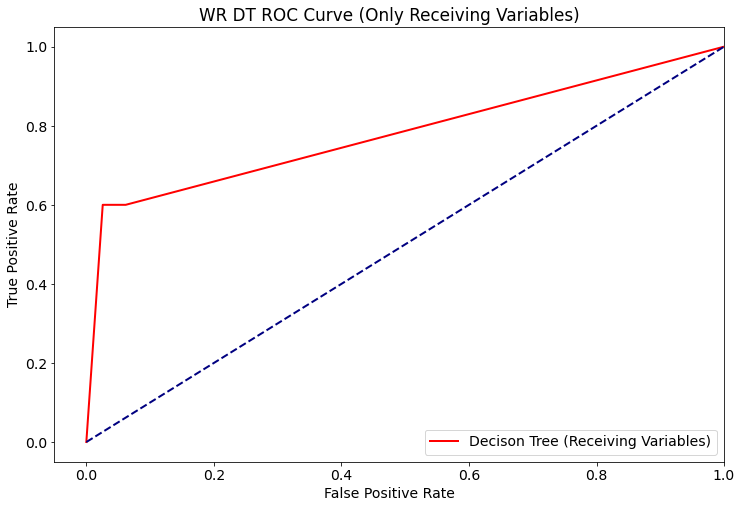

In [30]:
fpr2, tpr2, _ = roc_curve(test_y2_2, dt2_prob[:,1])
plt.plot(fpr2,tpr2, color ='red', lw=2, label="Decison Tree (Receiving Variables)")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-.05, 1.0])
plt.ylim([-.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('WR DT ROC Curve (Only Receiving Variables)')
plt.legend(loc="lower right")
# plt.show()
plt.savefig(os.path.join(path_parent, 'Figures\WRs\DT_Receiving.jpg'), bbox_inches='tight')

<h3> Wide Receiver Random Forrest (All Variables) [1] </h3>

In [31]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [155,160,165, 170],
    'max_features': [10,11,12,13],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [12,13,14,15,16],
    'n_estimators': [80,90,100,110]
}
rf = RandomForestClassifier()
grid_search1 = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [32]:
grid_search1.fit(train_x1, train_y1)

Fitting 5 folds for each of 960 candidates, totalling 4800 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [155, 160, 165, 170],
                         'max_features': [10, 11, 12, 13],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [12, 13, 14, 15, 16],
                         'n_estimators': [80, 90, 100, 110]},
             verbose=2)

In [33]:
grid_search1.best_params_

{'bootstrap': True,
 'max_depth': 165,
 'max_features': 12,
 'min_samples_leaf': 2,
 'min_samples_split': 15,
 'n_estimators': 80}

In [34]:
rf_mod1 = grid_search1.best_estimator_
print(rf_mod1)
rfc_pred1 = rf_mod1.predict(test_x1)

RandomForestClassifier(max_depth=165, max_features=12, min_samples_leaf=2,
                       min_samples_split=15, n_estimators=80)


In [35]:
print(confusion_matrix(test_y1,rfc_pred1))

[[1156   11]
 [  37   48]]


In [36]:
print(classification_report(test_y1, rfc_pred1))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1167
           1       0.81      0.56      0.67        85

    accuracy                           0.96      1252
   macro avg       0.89      0.78      0.82      1252
weighted avg       0.96      0.96      0.96      1252



In [37]:
rfc_prob1 = rf_mod1.predict_proba(test_x1)

In [38]:
test_rfc_y1_2 = test_y1.to_numpy()
roc_auc_score(test_rfc_y1_2, rfc_prob1[:,1])

0.9517415192297999

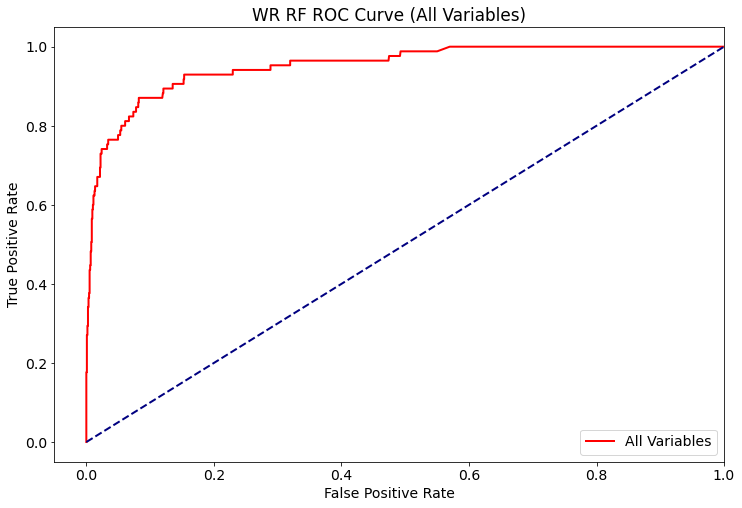

In [39]:
fpr_rfc_1, tpr_rfc_1, _ = roc_curve(test_rfc_y1_2, rfc_prob1[:,1])
plt.plot(fpr_rfc_1,tpr_rfc_1, color ='red', lw=2, label="All Variables")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-.05, 1.0])
plt.ylim([-.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('WR RF ROC Curve (All Variables)')
plt.legend(loc="lower right")
# plt.show()
plt.savefig(os.path.join(path_parent, 'Figures\WRs\ROC_All.jpg'), bbox_inches='tight')

<h3> Wide Receiver Random Forest (Receiving Variables) [2] </h3>

In [40]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [100,110,130],
    'max_features': [2,3,4],
    'min_samples_leaf': [9,11,13],
    'min_samples_split': [10,11,12],
    'n_estimators': [100,110,120]
}
rf = RandomForestClassifier()
grid_search2 = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [41]:
# Fit the grid search to the data
grid_search2.fit(train_x2, train_y2)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [100, 110, 130],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [9, 11, 13],
                         'min_samples_split': [10, 11, 12],
                         'n_estimators': [100, 110, 120]},
             verbose=2)

In [42]:
grid_search2.best_params_

{'bootstrap': True,
 'max_depth': 130,
 'max_features': 3,
 'min_samples_leaf': 9,
 'min_samples_split': 12,
 'n_estimators': 100}

In [43]:
rf_mod2 = grid_search2.best_estimator_
print(rf_mod2)
rfc_pred2 = rf_mod2.predict(test_x2)

RandomForestClassifier(max_depth=130, max_features=3, min_samples_leaf=9,
                       min_samples_split=12)


In [44]:
print(confusion_matrix(test_y2,rfc_pred2))

[[1156   11]
 [  39   46]]


In [45]:
print(classification_report(test_y2, rfc_pred2))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1167
           1       0.81      0.54      0.65        85

    accuracy                           0.96      1252
   macro avg       0.89      0.77      0.81      1252
weighted avg       0.96      0.96      0.96      1252



In [46]:
rfc_prob2 = rf_mod2.predict_proba(test_x2)

In [47]:
test_rfc_y2_2 = test_y2.to_numpy()
roc_auc_score(test_rfc_y2_2, rfc_prob2[:,1])

0.9405463985079893

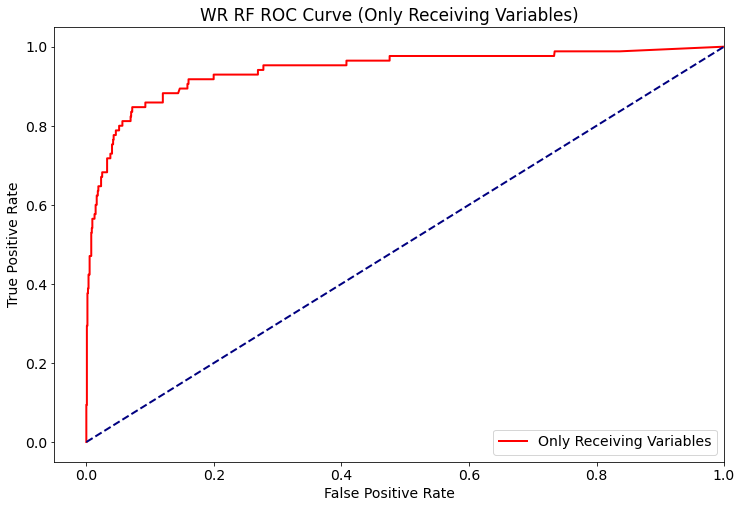

In [48]:
fpr_rfc_2, tpr_rfc_2, _ = roc_curve(test_rfc_y2_2, rfc_prob2[:,1])
plt.plot(fpr_rfc_2,tpr_rfc_2, color ='red', lw=2, label="Only Receiving Variables")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-.05, 1.0])
plt.ylim([-.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('WR RF ROC Curve (Only Receiving Variables)')
plt.legend(loc="lower right")
# plt.show()
plt.savefig(os.path.join(path_parent, 'Figures\WRs\ROC_Receiving.jpg'), bbox_inches='tight')

<h3> Plot all 4 ROC Curves together </h3>

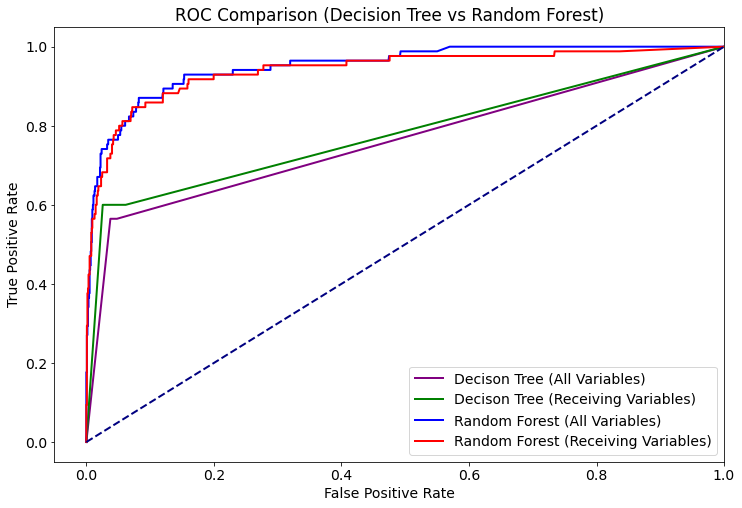

In [49]:
plt.plot(fpr1,tpr1, color ='purple', lw=2, label="Decison Tree (All Variables)")
plt.plot(fpr2,tpr2, color ='green', lw=2, label="Decison Tree (Receiving Variables)")
plt.plot(fpr_rfc_1,tpr_rfc_1, color ='blue', lw=2, label="Random Forest (All Variables)")
plt.plot(fpr_rfc_2,tpr_rfc_2, color ='red', lw=2, label="Random Forest (Receiving Variables)")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-.05, 1.0])
plt.ylim([-.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Comparison (Decision Tree vs Random Forest)')
plt.legend(loc="lower right")
# plt.show()
plt.savefig(os.path.join(path_parent, 'Figures\WRs\RF_DT_ROC_Comparison.jpg'), bbox_inches='tight')

In [50]:
print('DT ALL VARIABLES: \n')
print("Confusion Matrix:")
print(confusion_matrix(test_y1,dt1_pred))
print("\n Classification Report: ")
print(classification_report(test_y1,dt1_pred))

DT ALL VARIABLES: 

Confusion Matrix:
[[1123   44]
 [  37   48]]

 Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1167
           1       0.52      0.56      0.54        85

    accuracy                           0.94      1252
   macro avg       0.74      0.76      0.75      1252
weighted avg       0.94      0.94      0.94      1252



In [51]:
print('DT ONLY RECEIVING VARIABLES: \n')
print("Confusion Matrix:")
print(confusion_matrix(test_y2,rfc_pred2))
print("\n Classification Report: ")
print(classification_report(test_y2, rfc_pred2))

DT ONLY RECEIVING VARIABLES: 

Confusion Matrix:
[[1156   11]
 [  39   46]]

 Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1167
           1       0.81      0.54      0.65        85

    accuracy                           0.96      1252
   macro avg       0.89      0.77      0.81      1252
weighted avg       0.96      0.96      0.96      1252



In [52]:
print('RF ALL VARIABLES: \n')
print("Confusion Matrix:")
print(confusion_matrix(test_y2,dt2_pred))
print("\n Classification Report: ")
print(classification_report(test_y2,dt2_pred))

RF ALL VARIABLES: 

Confusion Matrix:
[[1137   30]
 [  34   51]]

 Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1167
           1       0.63      0.60      0.61        85

    accuracy                           0.95      1252
   macro avg       0.80      0.79      0.79      1252
weighted avg       0.95      0.95      0.95      1252



In [53]:
print('RF ONLY RECEIVING VARIABLES: \n')
print("Confusion Matrix:")
print(confusion_matrix(test_y2,rfc_pred2))
print("\n Classification Report: ")
print(classification_report(test_y2, rfc_pred2))

RF ONLY RECEIVING VARIABLES: 

Confusion Matrix:
[[1156   11]
 [  39   46]]

 Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1167
           1       0.81      0.54      0.65        85

    accuracy                           0.96      1252
   macro avg       0.89      0.77      0.81      1252
weighted avg       0.96      0.96      0.96      1252



**Decision trees perform worse in both cases**

Moving forward, only use Random Forest models. Below, I will plot the feature importance and fit a new random forest model to the top n receiving variables, where n is based on a natural split in the feature importance plot.

<h3> Visualize feature importance for all variables </h3>

In [54]:
print(type(rf_mod1.feature_importances_))
print(len(rf_mod1.feature_importances_))
rf_mod1.feature_importances_

<class 'numpy.ndarray'>
45


array([1.76338203e-02, 8.24458651e-03, 1.08322256e-02, 4.79737312e-04,
       2.83327789e-03, 9.79759874e-03, 1.08760274e-02, 9.12401411e-03,
       1.06022469e-02, 1.08457218e-01, 9.44527004e-02, 1.56001382e-02,
       1.97925840e-01, 1.93718341e-02, 3.05665067e-02, 1.73818810e-01,
       2.03631855e-02, 2.33047296e-02, 8.15572534e-02, 1.33468484e-01,
       8.35022242e-03, 0.00000000e+00, 2.67062040e-03, 0.00000000e+00,
       3.73772538e-04, 1.76926108e-05, 2.43131222e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 9.98331846e-04, 8.20056183e-04,
       8.12081891e-04, 5.98591635e-04, 4.20550814e-04, 9.08737205e-04,
       1.16450319e-03, 6.46775988e-05, 2.85418560e-04, 6.35025184e-04,
       6.80865619e-04, 1.64548620e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00])

In [55]:
feat = wr_df_features.columns.to_list()
arr = np.array(feat)
print(len(arr))

46


In [56]:
arr

array(['GS', 'Rush_Att', 'Rush_Yds', 'Rush_TD', 'Rush_1D', 'Rush_Lng',
       'Rush_Y/A', 'Rush_Y/G', 'Rush_Fmb', 'Rec_Tgt', 'Rec_Rec',
       'Rec_Ctch%', 'Rec_Yds', 'Rec_Y/R', 'Rec_TD', 'Rec_1D', 'Rec_Lng',
       'Rec_Y/Tgt', 'Rec_R/G', 'Rec_Y/G', 'Rec_Fmb', 'Pass_Cmp',
       'Pass_Att', 'Pass_Cmp%', 'Pass_Yds', 'Pass_TD', 'Pass_TD%',
       'Pass_Int', 'Pass_Int%', 'Pass_1D', 'Pass_Lng', 'Pass_Y/A',
       'Pass_AY/A', 'Pass_Y/C', 'Pass_Y/G', 'Pass_Rate', 'Pass_QBR',
       'Pass_Sk', 'Pass_Yds.1', 'Pass_Sk%', 'Pass_NY/A', 'Pass_ANY/A',
       'Pass_4QC', 'Pass_GWD', 'QBrec', 'probowl'], dtype='<U10')

In [57]:
#Drop probowl column 
arr = arr[0:45]
print(len(arr))

45


<BarContainer object of 45 artists>

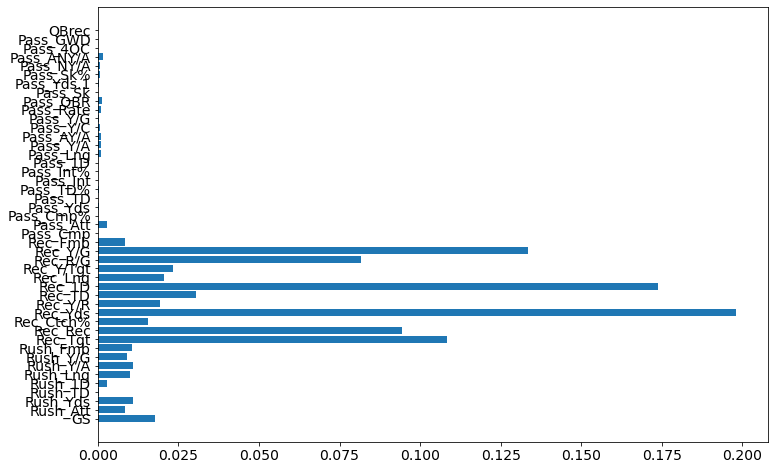

In [58]:
plt.barh(arr, rf_mod1.feature_importances_)

**Sort Feature Importance**

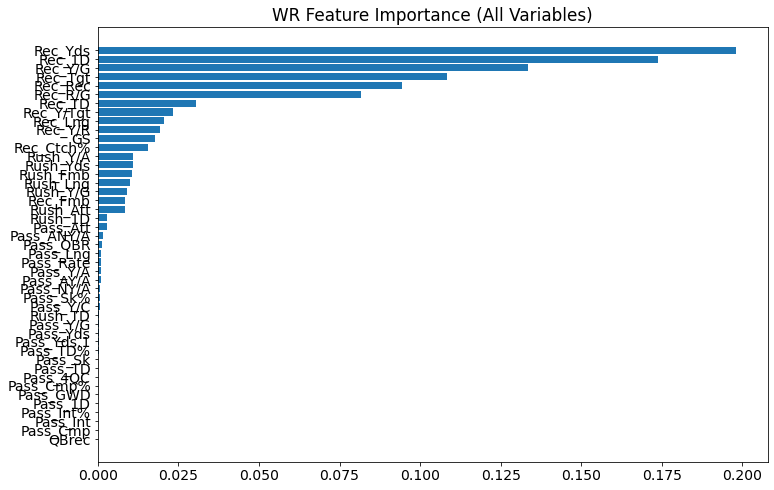

In [59]:
sorted_idx = rf_mod1.feature_importances_.argsort()
plt.barh(arr[sorted_idx], rf_mod1.feature_importances_[sorted_idx])
plt.title('WR Feature Importance (All Variables)')

plt.savefig(os.path.join(path_parent, 'Figures\WRs\FeatureImportance_All.jpg'), bbox_inches='tight')

<h3> Visualize feature importance for only receiving variables </h3>

In [60]:
print(type(rf_mod2.feature_importances_))
print(len(rf_mod2.feature_importances_))
rf_mod2.feature_importances_

<class 'numpy.ndarray'>
14


array([0.0146899 , 0.10329282, 0.08344048, 0.0124557 , 0.26535966,
       0.01616142, 0.03594478, 0.13013961, 0.02217338, 0.02062607,
       0.07221322, 0.2110424 , 0.01246056, 0.        ])

In [61]:
feat = wr_df_features2.columns.to_list()
arr2 = np.array(feat)

In [62]:
arr

array(['GS', 'Rush_Att', 'Rush_Yds', 'Rush_TD', 'Rush_1D', 'Rush_Lng',
       'Rush_Y/A', 'Rush_Y/G', 'Rush_Fmb', 'Rec_Tgt', 'Rec_Rec',
       'Rec_Ctch%', 'Rec_Yds', 'Rec_Y/R', 'Rec_TD', 'Rec_1D', 'Rec_Lng',
       'Rec_Y/Tgt', 'Rec_R/G', 'Rec_Y/G', 'Rec_Fmb', 'Pass_Cmp',
       'Pass_Att', 'Pass_Cmp%', 'Pass_Yds', 'Pass_TD', 'Pass_TD%',
       'Pass_Int', 'Pass_Int%', 'Pass_1D', 'Pass_Lng', 'Pass_Y/A',
       'Pass_AY/A', 'Pass_Y/C', 'Pass_Y/G', 'Pass_Rate', 'Pass_QBR',
       'Pass_Sk', 'Pass_Yds.1', 'Pass_Sk%', 'Pass_NY/A', 'Pass_ANY/A',
       'Pass_4QC', 'Pass_GWD', 'QBrec'], dtype='<U10')

In [63]:
#Drop probowl column
arr2=arr2[0:14]
print(len(arr2))

14


Sort the feature importance

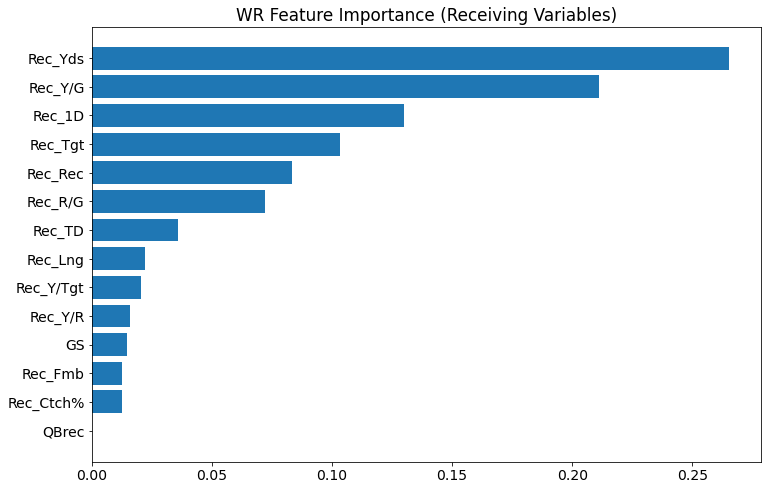

In [64]:
sorted_idx = rf_mod2.feature_importances_.argsort()
plt.barh(arr2[sorted_idx], rf_mod2.feature_importances_[sorted_idx])
plt.title('WR Feature Importance (Receiving Variables)')

plt.savefig(os.path.join(path_parent, 'Figures\WRs\FeatureImportance_Receiving.jpg'), bbox_inches='tight')

<h3> RF Model with only the top 6 Receiving variables [3] </h3>

In [65]:
top_wr_features = wr_df[['Rec_Yds','Rec_Y/G','Rec_1D','Rec_Rec','Rec_Tgt','Rec_R/G','probowl']]
top_wr_features.head()

,Rec_Yds,Rec_Y/G,Rec_1D,Rec_Rec,Rec_Tgt,Rec_R/G,probowl
0,592,37.0,34,51,126,3.2,0
1,653,40.8,29,50,74,3.1,0
2,422,28.1,24,39,82,2.6,0
3,350,38.9,18,25,43,2.8,0
4,944,59.0,46,83,119,5.2,0


In [66]:
train3, test3 = train_test_split(top_wr_features, test_size=0.333, stratify=top_wr_features['probowl'])
train_y3 = train3['probowl']
train_x3=train3.drop(columns=['probowl'])
test_y3=test3['probowl']
test_x3=test3.drop(columns=['probowl'])

In [67]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [100,110,130],
    'max_features': [2,3,4],
    'min_samples_leaf': [9,11,13],
    'min_samples_split': [10,11,12],
    'n_estimators': [100,110,120]
}
rf = RandomForestClassifier()
grid_search3 = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [68]:
# Fit the grid search to the data
grid_search3.fit(train_x3, train_y3)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [100, 110, 130],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [9, 11, 13],
                         'min_samples_split': [10, 11, 12],
                         'n_estimators': [100, 110, 120]},
             verbose=2)

In [69]:
grid_search3.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 2,
 'min_samples_leaf': 13,
 'min_samples_split': 11,
 'n_estimators': 120}

In [70]:
rf_mod3 = grid_search3.best_estimator_
print(rf_mod3)
rfc_pred3 = rf_mod3.predict(test_x3)

RandomForestClassifier(max_depth=100, max_features=2, min_samples_leaf=13,
                       min_samples_split=11, n_estimators=120)


In [71]:
print(confusion_matrix(test_y3,rfc_pred3))

[[1155   12]
 [  43   42]]


In [72]:
print(classification_report(test_y3, rfc_pred3))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1167
           1       0.78      0.49      0.60        85

    accuracy                           0.96      1252
   macro avg       0.87      0.74      0.79      1252
weighted avg       0.95      0.96      0.95      1252



In [73]:
rfc_prob3 = rf_mod3.predict_proba(test_x3)

In [74]:
test_rfc_y3_2 = test_y3.to_numpy()
roc_auc_score(test_rfc_y3_2, rfc_prob3[:,1])

0.9346942890266646

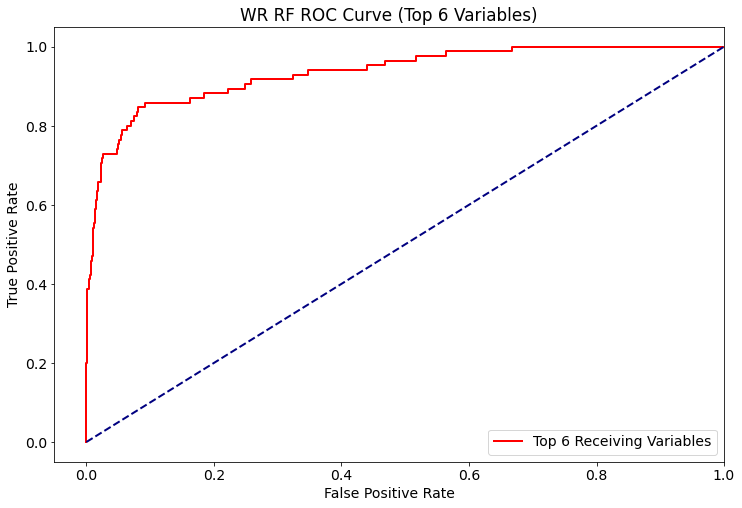

<Figure size 864x576 with 0 Axes>

In [75]:
fpr_rfc_3, tpr_rfc_3, _ = roc_curve(test_rfc_y3_2, rfc_prob3[:,1])
plt.plot(fpr_rfc_3,tpr_rfc_3, color ='red', lw=2, label="Top 6 Receiving Variables")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-.05, 1.0])
plt.ylim([-.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('WR RF ROC Curve (Top 6 Variables)')
plt.legend(loc="lower right")
plt.show()
plt.savefig(os.path.join(path_parent, 'Figures\WRs\ROC_Top6Receiving.jpg'), bbox_inches='tight')

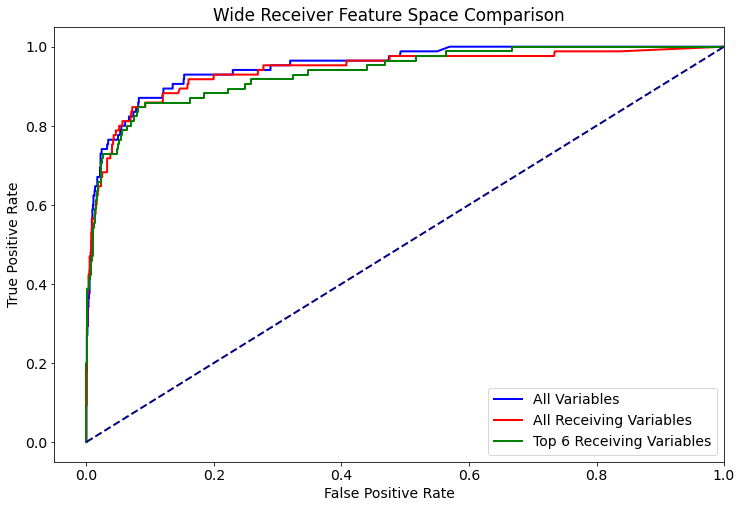

In [76]:
plt.plot(fpr_rfc_1,tpr_rfc_1, color ='blue', lw=2, label="All Variables")
plt.plot(fpr_rfc_2,tpr_rfc_2, color ='red', lw=2, label="All Receiving Variables")
plt.plot(fpr_rfc_3,tpr_rfc_3, color ='green', lw=2, label="Top 6 Receiving Variables")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-.05, 1.0])
plt.ylim([-.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Wide Receiver Feature Space Comparison')
plt.legend(loc="lower right")
# plt.show()
plt.savefig(os.path.join(path_parent, 'Figures\WRs\WR_ROC_Comparison.jpg'), bbox_inches='tight')

In [77]:
print('ALL VARIABLES: \n')
print("Confusion Matrix:")
print(confusion_matrix(test_y1,rfc_pred1))
print("\n Classification Report: ")
print(classification_report(test_y1, rfc_pred1))

ALL VARIABLES: 

Confusion Matrix:
[[1156   11]
 [  37   48]]

 Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1167
           1       0.81      0.56      0.67        85

    accuracy                           0.96      1252
   macro avg       0.89      0.78      0.82      1252
weighted avg       0.96      0.96      0.96      1252



In [78]:
print('ONLY RECEIVING VARIABLES: \n')
print("Confusion Matrix:")
print(confusion_matrix(test_y2,rfc_pred2))
print("\n Classification Report: ")
print(classification_report(test_y2, rfc_pred2))

ONLY RECEIVING VARIABLES: 

Confusion Matrix:
[[1156   11]
 [  39   46]]

 Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1167
           1       0.81      0.54      0.65        85

    accuracy                           0.96      1252
   macro avg       0.89      0.77      0.81      1252
weighted avg       0.96      0.96      0.96      1252



In [79]:
print('TOP 6 RECEIVING VARIABLES: \n')
print("Confusion Matrix:")
print(confusion_matrix(test_y3,rfc_pred3))
print("\n Classification Report: ")
print(classification_report(test_y3, rfc_pred3))

TOP 6 RECEIVING VARIABLES: 

Confusion Matrix:
[[1155   12]
 [  43   42]]

 Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1167
           1       0.78      0.49      0.60        85

    accuracy                           0.96      1252
   macro avg       0.87      0.74      0.79      1252
weighted avg       0.95      0.96      0.95      1252



**All 3 random forest models result in an F1-Score of 0.98 for identifying non-Pro-Bowl players**

Using all 46 variables results in the highest F1-Score for identifying Pro-Bowl players (0.7).

Using only receiving variables results in the next highest F1-Score for identifying Pro-Bowl players (0.68).

The lowest Pro-Bowl F1-score (0.66) is the model that only used the 6 most important receiving features.

Since the model with the top 6 receiving variables performs nearly as good as the model with the all varialbes, it should be the model used to predict new instances of data because of Occam's Razor and its generalization ability.